# MARKETING CAMPAIGN

In [1]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

Campaign Efficiency:

AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise

Prédiction de la campagne 6 : Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise

Info Customer:

Education - customer’s level of education Marital - customer’s marital status Kidhome - number of small children in customer’s household Teenhome - number of teenagers in customer’s household Income - customer’s yearly household income

Info Behaviour : Complain - 1 if customer complained in the last 2 years DtCustomer - date of customer’s enrolment with the company Recency - number of days since the last purchase

MntFishProducts - amount spent on fish products in the last 2 years MntMeatProducts - amount spent on meat products in the last 2 years MntFruits - amount spent on fruits products in the last 2 years MntSweetProducts - amount spent on sweet products in the last 2 years MntWines - amount spent on wine products in the last 2 years MntGoldProds - amount spent on gold products in the last 2 years

NumDealsPurchases - number of purchases made with discount NumCatalogPurchases - number of purchases made using catalogue NumStorePurchases - number of purchases made directly in stores NumWebPurchases - number of purchases made through company’s web site NumWebVisitsMonth - number of visits to company’s web site in the last month

In [2]:
mktg_campaign = pd.read_csv('marketing_campaign.csv', sep=';')

## Profiling

In [3]:
mktg_campaign.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
mktg_campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
mktg_campaign.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [6]:
mktg_campaign.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [7]:
mktg_campaign['ID'].nunique()

2240

In [8]:
mktg_campaign['Z_CostContact'].nunique()

1

In [9]:
mktg_campaign['Z_Revenue'].nunique()

1

## Data prep

In [10]:
# the number of NaN in column 'Income' is insignificant enough to drop the related rows -> inform the colleague responsible for to correct data
df = mktg_campaign.dropna(subset=['Income'])
df = df.reset_index(drop=True)
df.shape

(2216, 29)

In [11]:
df.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2211,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2212,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2213,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2214,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0
2215,9405,1954,PhD,Married,52869.0,1,1,2012-10-15,40,84,...,7,0,0,0,0,0,0,3,11,1


In [12]:
# converting to right types
df['Year_Birth'] = df['Year_Birth'].astype('int64')
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [13]:
# dealing with data quality: too old customers -> inform the colleague responsible for to correct data
print (sorted(df['Year_Birth'].unique()))

[1893, 1899, 1900, 1940, 1941, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996]


In [14]:
df.drop(df.loc[df['Year_Birth']<1940].index, inplace=True)
df = df.reset_index(drop=True)

In [15]:
df.shape

(2213, 29)

In [16]:
# dealing with data quality: non explicit marital status -> inform the colleague responsible for to correct data
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [17]:
print(len(df[df['Marital_Status'] == 'Single']))

470


In [18]:
print(len(df[df['Marital_Status'] == 'Alone']))

3


In [19]:
print(len(df[df['Marital_Status'] == 'YOLO']))

2


In [20]:
df.drop(df.loc[df['Marital_Status']=='Alone'].index, inplace=True)
df.drop(df.loc[df['Marital_Status']=='YOLO'].index, inplace=True)
df.drop(df.loc[df['Marital_Status']=='Absurd'].index, inplace=True)
df = df.reset_index(drop=True)

In [21]:
df.shape

(2206, 29)

In [22]:
# number of minors at home
df['Minorhome'] = df['Kidhome'] + df['Teenhome']

In [23]:
# customer's seniority
df['seniority'] = (pd.to_datetime('today').normalize()) - df['Dt_Customer']
df['seniority'] = df['seniority'].dt.days
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Minorhome,seniority
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,3,11,1,0,3125
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,3,11,0,2,2575
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,3,11,0,0,2774
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,3,11,0,1,2601
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,3,11,0,1,2623


In [24]:
# data vizualisation -> Power BI
df.to_csv('df.csv')

# RFM

In [25]:
df_rfm=pd.DataFrame()
df_rfm['ID'] = df['ID']
df_rfm['recency'] = df['Recency']
df_rfm['frequency'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']
df_rfm['amount'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df_rfm['response'] = df['Response']
df_rfm

,ID,recency,frequency,amount,response
0,5524,58,25,1617,1
1,2174,38,6,27,0
2,4141,26,21,776,0
3,6182,26,8,53,0
4,5324,94,19,422,0
...,...,...,...,...,...
2201,10870,46,18,1341,0
2202,4001,56,22,444,0
2203,7270,91,19,1241,0
2204,8235,8,23,843,0


## Data standardisation

In [26]:
X = df_rfm.drop(['ID'], axis=1).to_numpy()
X

array([[  58,   25, 1617,    1],
       [  38,    6,   27,    0],
       [  26,   21,  776,    0],
       ...,
       [  91,   19, 1241,    0],
       [   8,   23,  843,    0],
       [  40,   11,  172,    1]], dtype=int64)

In [27]:
scaler = StandardScaler()

In [28]:
scaled_X = scaler.fit(X)
scaled_X

StandardScaler()

In [29]:
scaled_X = scaler.transform(X)
scaled_X

array([[ 0.30858109,  1.31832324,  1.67527636,  2.38429203],
       [-0.3826205 , -1.15775672, -0.96238794, -0.41941171],
       [-0.79734146,  0.79704325,  0.28013443, -0.41941171],
       ...,
       [ 1.44906372,  0.53640325,  1.05152681, -0.41941171],
       [-1.41942289,  1.05768325,  0.39128129, -0.41941171],
       [-0.31350034, -0.50615673, -0.72184622,  2.38429203]])

# Clustering

## Elbow method

In [30]:
n_clusters = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

inertias = [] #somme des distances entre les différents points et les centroides, indicateur d'erreur en quelque sorte

for k in n_clusters:
    model = KMeans(n_clusters=k, random_state=0)
    model.fit(X)
    inertias = np.append(inertias, model.inertia_)

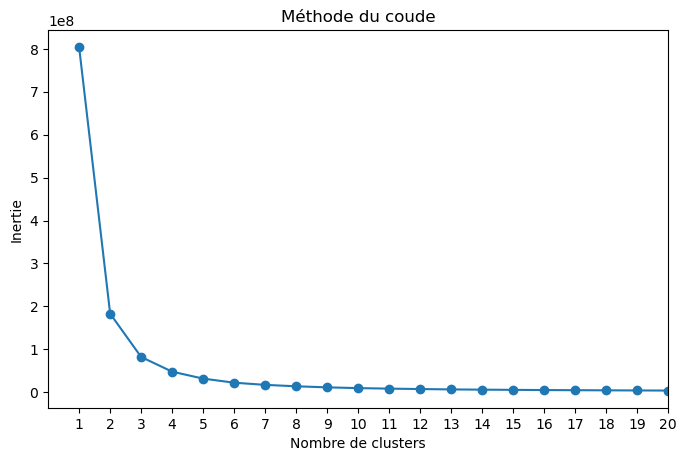

In [31]:
plt.figure(figsize=(8, 5), dpi=100)

plt.title("Méthode du coude")

plt.plot(n_clusters, inertias, '-o')

plt.xlabel("Nombre de clusters")
plt.ylabel("Inertie")

plt.xticks(n_clusters)

plt.xlim(0, 20)

plt.show()

In [32]:
model = KMeans(n_clusters=4, random_state=0)
model.fit(scaled_X)

KMeans(n_clusters=4, random_state=0)

In [33]:
y_predict = model.predict(scaled_X)

In [34]:
df_rfm['cluster'] = model.labels_
df_rfm.head()

,ID,recency,frequency,amount,response,cluster
0,5524,58,25,1617,1,2
1,2174,38,6,27,0,3
2,4141,26,21,776,0,1
3,6182,26,8,53,0,3
4,5324,94,19,422,0,0


In [35]:
df_rfm.groupby('cluster').count()

,ID,recency,frequency,amount,response
cluster,,,,,
0,544,544,544,544,544
1,762,762,762,762,762
2,330,330,330,330,330
3,570,570,570,570,570


In [36]:
# data vizualisation -> power BI
df_rfm.to_csv('rfm_clusters.csv')

# Correlation matrix

In [37]:
# one hot encoding
df_final = pd.get_dummies(df.drop(['ID', 'Dt_Customer', 'Minorhome', 'Z_CostContact', 'Z_Revenue', 'seniority'], axis = 1), drop_first = True)

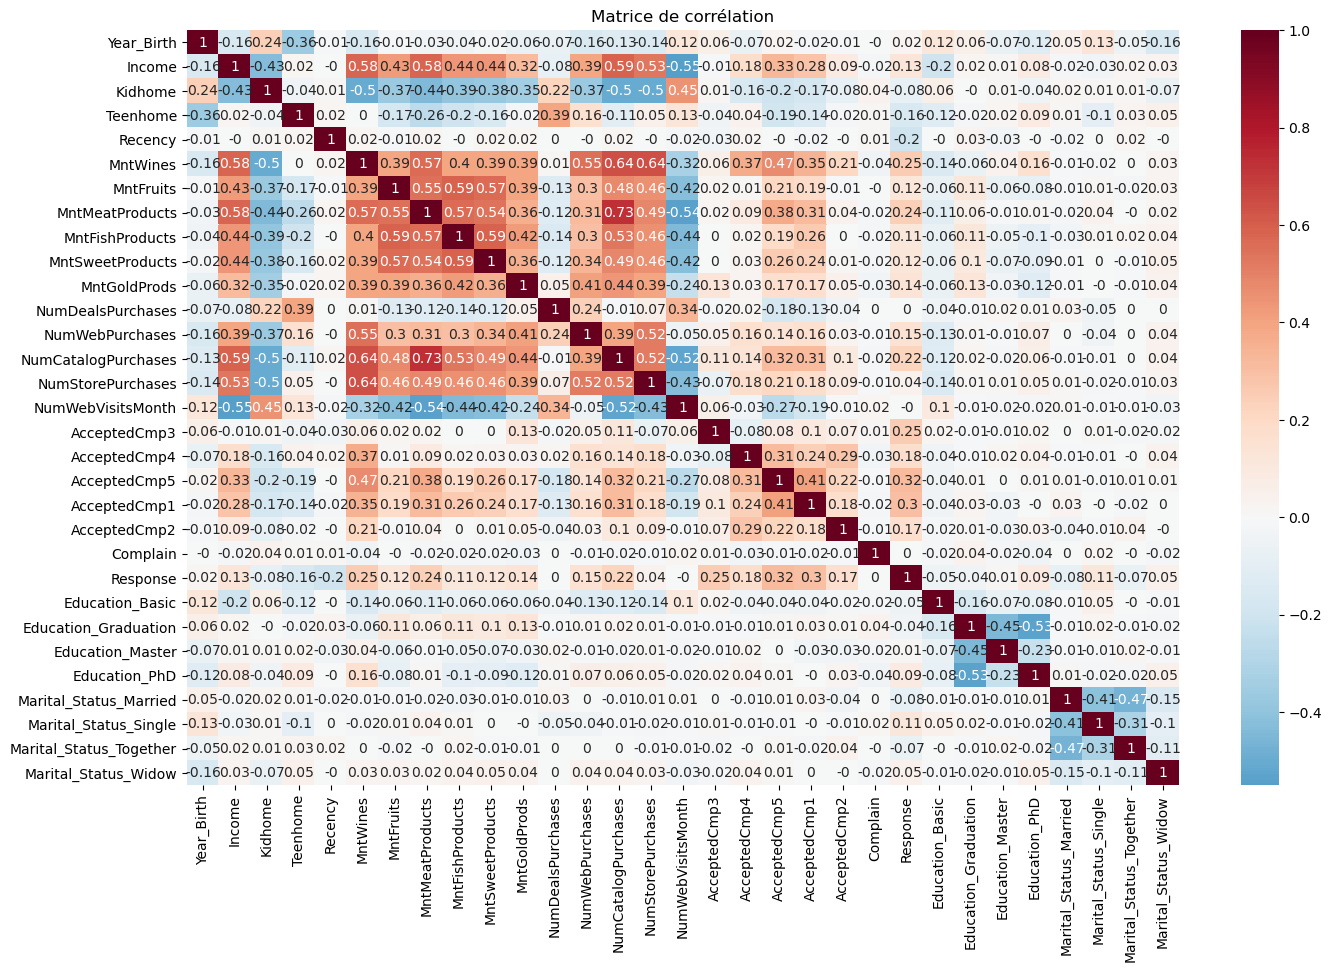

In [38]:
correlation_matrix = df_final.corr().round(2)
plt.figure(figsize=(16, 10), dpi=100)
plt.title("Matrice de corrélation")
sns.heatmap(correlation_matrix, cmap="RdBu_r", center=0.0, annot=True)
plt.show()